# 01 EDA
Load data, check leakage, quick plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\6 Project\ZeroAlgae\Research\carbon-fixation-ml-starter\data\processed\example_daily_fixation.csv")
df.describe()

,air_temp_c,solar_irradiance_w_m2,ph,do_mg_l,salinity_psu,weekday,co2_fixation_kg_m3_day
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,29.000000,692.000000,7.300000,6.000000,30.0,3.000000,0.862000
std,1.581139,78.549348,0.158114,0.223607,0.0,1.581139,0.080125
min,27.000000,590.000000,7.100000,5.700000,30.0,1.000000,0.750000
25%,28.000000,650.000000,7.200000,5.900000,30.0,2.000000,0.820000
50%,29.000000,700.000000,7.300000,6.000000,30.0,3.000000,0.880000
75%,30.000000,720.000000,7.400000,6.100000,30.0,4.000000,0.900000
max,31.000000,800.000000,7.500000,6.300000,30.0,5.000000,0.960000


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# point to your file (absolute or relative)
DATA_CSV = r"D:\6 Project\ZeroAlgae\Research\carbon-fixation-ml-starter\data\processed\example_daily_fixation.csv"
df = pd.read_csv(DATA_CSV)

print(df.shape)
df.head()

(5, 7)


,air_temp_c,solar_irradiance_w_m2,ph,do_mg_l,salinity_psu,weekday,co2_fixation_kg_m3_day
0,28,650,7.4,6.1,30,1,0.82
1,30,720,7.2,5.9,30,2,0.90
2,27,590,7.5,6.3,30,3,0.75
3,31,800,7.1,5.7,30,4,0.96
4,29,700,7.3,6.0,30,5,0.88


In [3]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_temp_c              5 non-null      int64  
 1   solar_irradiance_w_m2   5 non-null      int64  
 2   ph                      5 non-null      float64
 3   do_mg_l                 5 non-null      float64
 4   salinity_psu            5 non-null      int64  
 5   weekday                 5 non-null      int64  
 6   co2_fixation_kg_m3_day  5 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 412.0 bytes


,count,mean,std,min,25%,50%,75%,max
air_temp_c,5.0,29.000,1.581139,27.00,28.00,29.00,30.0,31.00
solar_irradiance_w_m2,5.0,692.000,78.549348,590.00,650.00,700.00,720.0,800.00
ph,5.0,7.300,0.158114,7.10,7.20,7.30,7.4,7.50
do_mg_l,5.0,6.000,0.223607,5.70,5.90,6.00,6.1,6.30
salinity_psu,5.0,30.000,0.000000,30.00,30.00,30.00,30.0,30.00
weekday,5.0,3.000,1.581139,1.00,2.00,3.00,4.0,5.00
co2_fixation_kg_m3_day,5.0,0.862,0.080125,0.75,0.82,0.88,0.9,0.96


In [4]:
df.isna().sum().sort_values(ascending=False)

# if any missing, choose a simple fill strategy (example)
# num_cols = df.select_dtypes(include=np.number).columns
# df[num_cols] = df[num_cols].fillna(df[num_cols].median())

air_temp_c                0
solar_irradiance_w_m2     0
ph                        0
do_mg_l                   0
salinity_psu              0
weekday                   0
co2_fixation_kg_m3_day    0
dtype: int64

In [5]:
# duplicates
dup_count = df.duplicated().sum()
print("duplicate rows:", dup_count)

# constant columns
constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
constant_cols

duplicate rows: 0


['salinity_psu']

In [6]:
target = "co2_fixation_kg_m3_day"
features = [c for c in df.columns if c != target]
features, target

(['air_temp_c',
  'solar_irradiance_w_m2',
  'ph',
  'do_mg_l',
  'salinity_psu',
  'weekday'],
 'co2_fixation_kg_m3_day')

In [7]:
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()
corr[target].sort_values(ascending=False)

co2_fixation_kg_m3_day    1.000000
solar_irradiance_w_m2     0.992253
air_temp_c                0.986671
weekday                   0.355202
ph                       -0.986671
do_mg_l                  -0.990708
salinity_psu                   NaN
Name: co2_fixation_kg_m3_day, dtype: float64

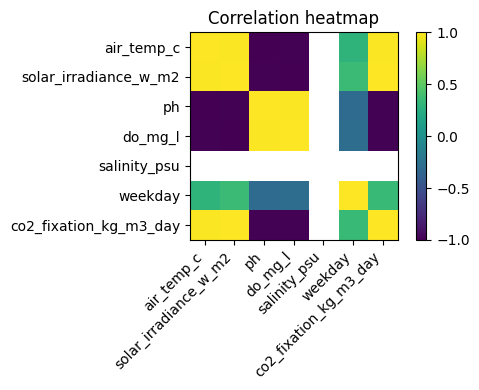

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(corr, interpolation='nearest')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

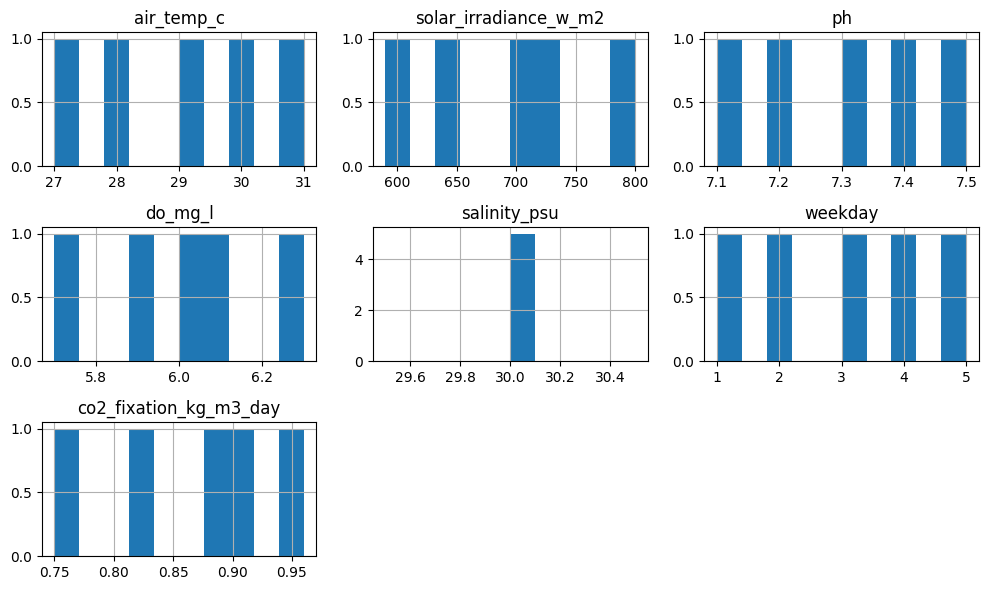

In [9]:
num_df.hist(bins=10, figsize=(10,6))
plt.tight_layout()
plt.show()

D:\6 Project\ZeroAlgae\Research\carbon-fixation-ml-starter\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\6 Project\ZeroAlgae\Research\carbon-fixation-ml-starter\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\6 Project\ZeroAlgae\Research\carbon-fixation-ml-starter\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


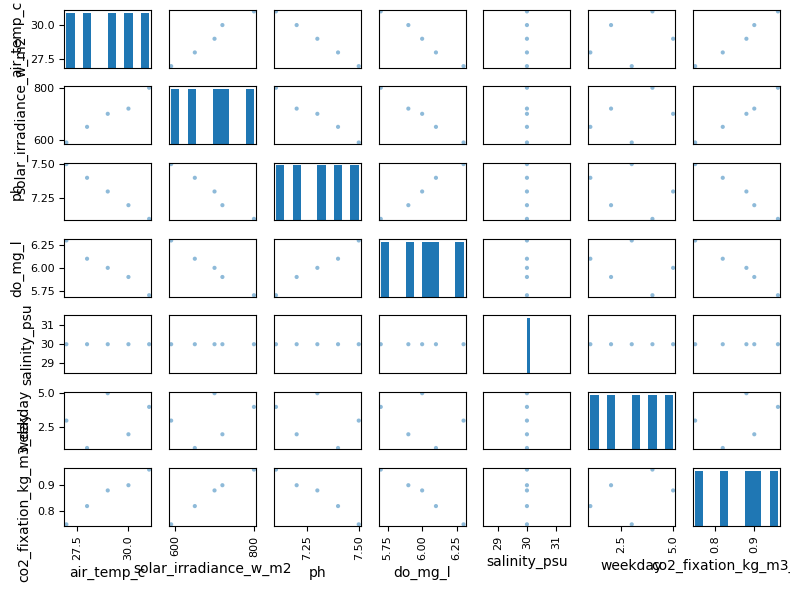

In [10]:
scatter_matrix(num_df[[*features, target]], figsize=(8,6))
plt.tight_layout()
plt.show()

In [11]:
def iqr_outliers(s: pd.Series):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < lower) | (s > upper)).sum()

{c: iqr_outliers(df[c]) for c in num_df.columns}

{'air_temp_c': np.int64(0),
 'solar_irradiance_w_m2': np.int64(0),
 'ph': np.int64(0),
 'do_mg_l': np.int64(0),
 'salinity_psu': np.int64(0),
 'weekday': np.int64(0),
 'co2_fixation_kg_m3_day': np.int64(0)}

In [12]:
# target shouldn’t be duplicated in features (name or exact values)
any((df[features] == df[target].values.reshape(-1,1)).all(axis=0))

# check too-perfect correlations (>0.98) which might be engineered leakage
high_corr = corr.abs() > 0.98
[(i,j) for i in corr.columns for j in corr.columns if i<j and high_corr.loc[i,j]]

[('air_temp_c', 'solar_irradiance_w_m2'),
 ('air_temp_c', 'ph'),
 ('air_temp_c', 'do_mg_l'),
 ('air_temp_c', 'co2_fixation_kg_m3_day'),
 ('ph', 'solar_irradiance_w_m2'),
 ('do_mg_l', 'solar_irradiance_w_m2'),
 ('do_mg_l', 'ph'),
 ('co2_fixation_kg_m3_day', 'solar_irradiance_w_m2'),
 ('co2_fixation_kg_m3_day', 'ph'),
 ('co2_fixation_kg_m3_day', 'do_mg_l')]

In [13]:
clean = df.copy()
# example: remove constant columns
if constant_cols:
    clean = clean.drop(columns=constant_cols)

out_path = Path(DATA_CSV).with_name("example_daily_fixation_clean.csv")
clean.to_csv(out_path, index=False)
out_path

WindowsPath('D:/6 Project/ZeroAlgae/Research/carbon-fixation-ml-starter/data/processed/example_daily_fixation_clean.csv')